
# Early Stage Diabetes Risk Prediction
## Phase 1: Data Preparation & VisualisationIntroduction


## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Literature Review](#Literature-Review)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)


## Introduction <a id='itr'></a>

### Dataset Source

Our study utilizes the Early Stage Diabetes Risk Prediction Dataset, which is publicly available through the UCI Machine Learning Repository. The data was originally collected from patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and contains various clinical features pertinent to diabetes diagnosis.


### Dataset Details

The dataset is instrumental in exploring the risk factors associated with early-stage diabetes. It comprises 520 records and 17 clinical features, including demographic information, symptomatology, and other risk factors. Notable for its mix of categorical and numerical data, it serves as a solid basis for predictive modeling. This study aims to analyze these features to predict the likelihood of diabetes using classification algorithms, offering potentially valuable insights for preemptive health measures.

. 
**Dataset Retrieval**

- We load our dataset directly from a specified local path into a pandas DataFrame for further analysis.t.
- We display 10 randomly sampled rows from this dataset.ataset.

In [43]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

from IPython.display import HTML

# so that we can see all the columns
pd.set_option('display.max_columns', None)

# Define the path to the file
#file_path = 'C:/Users/ASUS/Downloads/diabetes_data_upload.csv'
dataset= pd.read_csv("diabetes_data_upload.csv")

In [44]:
dataset.sample(10, random_state=9)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
181,31,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Positive
165,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No,Positive
482,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
292,46,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
337,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
95,56,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,Positive
166,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive
196,66,Male,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive


### Dataset Features

The features in our dataset are described in the table below.The dataset descriptions are sourced from the UCI Machine Learning Repository.

In [45]:
from tabulate import tabulate

table = [
    ['Name', 'Role', 'Type', 'Range', 'Description'],
    ['Age', 'Feature', 'Integer', '20-65', 'Age of the patient'],
    ['Gender', 'Feature', 'Categorical', 'Male/Female', 'Gender of the patient'],
    ['Polyuria', 'Feature', 'Binary', 'Yes/No', 'Presence of Polyuria'],
    ['Polydipsia', 'Feature', 'Binary', 'Yes/No', 'Presence of Polydipsia'],
    ['sudden_weight_loss', 'Feature', 'Binary', 'Yes/No', 'Experience of sudden weight loss'],
    ['weakness', 'Feature', 'Binary', 'Yes/No', 'Feeling of weakness'],
    ['Polyphagia', 'Feature', 'Binary', 'Yes/No', 'Increased appetite'],
    ['Genital thrush', 'Feature', 'Binary', 'Yes/No', 'Occurrence of genital thrush'],
    ['visual_blurring', 'Feature', 'Binary', 'Yes/No', 'Instances of visual blurring'],
    ['Itching', 'Feature', 'Binary', 'Yes/No', 'Presence of itching'],
    ['Irritability', 'Feature', 'Binary', 'Yes/No', 'Presence of irritability'],
    ['delayed_healing', 'Feature', 'Binary', 'Yes/No', 'Slow healing sores or wounds'],
    ['partial_paresis', 'Feature', 'Binary', 'Yes/No', 'Muscle weakness or paresis'],
    ['muscle_stiffness', 'Feature', 'Binary', 'Yes/No', 'Stiffness in muscles'],
    ['Alopecia', 'Feature', 'Binary', 'Yes/No', 'Hair loss'],
    ['Obesity', 'Feature', 'Binary', 'Yes/No', 'Obesity'],
    ['Class', 'Target', 'Binary', 'Positive/Negative', 'Diabetes diagnosis']
]
display(HTML('<b>Table 1: Datasset features</b>'))
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤═════════╤═════════════╤═══════════════════╤══════════════════════════════════╕
│ Name               │ Role    │ Type        │ Range             │ Description                      │
╞════════════════════╪═════════╪═════════════╪═══════════════════╪══════════════════════════════════╡
│ Age                │ Feature │ Integer     │ 20-65             │ Age of the patient               │
├────────────────────┼─────────┼─────────────┼───────────────────┼──────────────────────────────────┤
│ Gender             │ Feature │ Categorical │ Male/Female       │ Gender of the patient            │
├────────────────────┼─────────┼─────────────┼───────────────────┼──────────────────────────────────┤
│ Polyuria           │ Feature │ Binary      │ Yes/No            │ Presence of Polyuria             │
├────────────────────┼─────────┼─────────────┼───────────────────┼──────────────────────────────────┤
│ Polydipsia         │ Feature │ Binary      │ Yes/No            │ Presence of Pol

### Target Feature

In this analysis, our primary focus is on the 'Class' feature, which categorizes individuals according to their risk of early-stage diabetes—either positive or negative. That is, we will predict the likelihood of early-stage diabetes based on the explanatory variables, which include demographic characteristics, clinical symptoms, and other key risk factors.

## Goals and Objectives

Diabetes is a growing global health concern, and early detection is crucial for effective management and treatment. The development of a predictive model that can accurately identify the risk of early-stage diabetes based on clinical features would have significant real-world applications. For example, healthcare providers could offer more personalized care strategies, insurers could adjust coverage plans accordingly, and individuals could better manage their health with early interventions.

Therefore, the **primary goal** of this project is two fold: 
1. To predict the likelihood of early-stage diabetes in individuals based on a set of clinical and demographic features, and 
2. To identify which of these features are the most predictive of diabetes risk. 

A **secondary objective** is to conduct exploratory data analysis through basic descriptive statistics and data visualization techniques. This will help uncover patterns and relationships in the data after undergoing necessary data cleaning and preprocessing, as detailed in this Phase 1 report.

At this stage, we make a _critical assumption_: the records in our dataset are independent of each other. This means that each individual’s data is considered separate and not influenced by others in the dataset. Although this may oversimplify the complex interdependencies typical in medical data, this assumption enables us to bypass more complex longitudinal analysis, allowing for the application of standard predictive modeling techniques such as logistic regression.

## Literature Review

Diabetes is a chronic illness that affects the body's capacity to efficiently use food as fuel. The majority of food is converted by the body into glucose after eating and is then released into the bloodstream. A rise in blood sugar causes the pancreas to generate insulin, which functions as a key to open cells and let sugar in to be used as fuel (CDC 2023). 

For diabetes to be well managed and potential complications avoided, early identification is essential. Early detection of diabetes can reduce the health risk of a patient and both physicians and patients can be benefit from the prediction outcomes, as it would provide a chance to allocate resources properly. (Islam, 2017).

Based on clinical and demographic characteristics, machine learning algorithms have demonstrated potential in predicting the likelihood of diabetes. In the targeted geographic area of Bangladesh, the proportion of patients with diabetes increased dramatically to 10.0% in 2011, from 6.0% in 2006–2010 (Akter et al. 2014).  The goal of this review of the literature is to investigate the state of the art in this area, with a particular emphasis on predictive modeling for the early identification of diabetes. (Dutta et al. 2022)

Based on clinical and demographic data, machine learning algorithms have been used in previous studies to predict diabetes. Maniruzzaman et al. classified and predicted diabetes using machine learning methods. The National Health and Nutrition Examination Survey, which covered the years 2009 to 2012, provided them with their dataset. They used a variety of machine learning classifiers, and the Random Forest classifier produced the best accuracy of 94.25%. (n.d). A diabetes prediction system based on machine learning was presented by Singh et al. Several machine learning algorithms were used in their methodology, such as the decision tree-based Random Forest, and the probability-based Naive Bayes. These algorithms were applied to build prediction models for the purpose of diabetes diagnosis. (2017). Furthermore, in a study conducted by Yamuna et al, they embarked on finding the accuracy prediction using various Machine Learning algorithms which utilized the Prima Indian dataset as well, and concluded that 80% accuaracy was achived by using the Random Forest Classifier (2022). Moreover, Verma et al introduced a method for predicting breast cancer and diabetes employing Naive Bayes, Decision Tree, J48, and other algorithms with the WEKA classification tool. Their experiments demonstrated a diabetes prediction accuracy of 76.80% using the SMO algorithm on the Pima Indian diabetes dataset. (2017)

A diabetes prediction system using Random Forest, Decision Tree, Naive Bayes, SVM, K-Nearest Neighbours, and Logistic Regression was presented by Tiggaa et al. They used the Pima Indian dataset as well as their own dataset, which they gathered themselves and included 952 people who answered a questionnaire, to evaluate these algorithms. According to their experimental results, Random Forest outperformed the other evaluated algorithms in terms of prediction accuracy, attaining 94.10% (2020). A diabetes prediction technique using Naive Bayes, Decision Trees, and SVM algorithms was presented by Sisodia et al. Their research produced a prediction accuracy of 76.30% using the Pima Indian dataset. This accuracy fared better than other study-evaluated approaches (2018). Furthermore, in a study conducted in 2018, for the purpose of predicting diabetes mellitus, Zou et al. used decision tree, random forest, and neural network techniques. They examined 14 variables from hospital physical examination data from Luzhou, China. They used five-fold cross-validation to assess the models' performance. According to the results, random forest produced predictions with the highest accuracy (80.84%) when all attributes were taken into account (2018). On the other hand,  Kaur et a,  introduced a novel approach utilizing a modified J48 algorithm for efficient diabetes prediction from the Pima Indian dataset. Their experimental findings revealed an impressive prediction accuracy of 99.87%, representing a significant improvement over the performance of the existing J48 algorithm.(2014) 

Through secondary research, it was found that most studies focus on predicting diabetes based on clinical features. However, the project we have undertaken explores early-stage diabetes prediction, an important yet understudied area in previous research. It addresses a major need in healthcare and closes a gap in the literature by focusing on early detection. The initiative also attempts to identify the best predictive clinical and demographic characteristics in addition to predicting the likelihood of diabetes. This offers insightful information on the variables that lead to the development of diabetes, guiding the development of individualized care plans and advancing the accuracy of future models. Additionally, a notable limitation of our study is its reliance on data from only 512 individuals. To achieve better accuracy and deepen our understanding, it is imperative to expand the sample size.


## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Check irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values


Let's first display all the columns in our dataset.

In [46]:

print(f"Shape of the dataset = {dataset.shape} \n")


Shape of the dataset = (520, 17) 



Let's first display all the columns in our dataset.

In [47]:
display(HTML('<b> All the columns in dataset</b>'))
dataset.columns.to_list()

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

The renaming of the target variable "class" to "DiabetesRisk" in the dataset is recommended to avoid ambiguity and improve clarity. Since "class" is a reserved keyword in many programming languages, using it can lead to potential conflicts in code. Additionally, "DiabetesRisk" more accurately describes what the variable measures the likelihood of an individual developing diabetes making the dataset easier to understand and use in analysis.

In [48]:
dataset.rename(columns={'class': 'DiabetesRisk'}, inplace=True)

In [49]:
display(HTML('<b> Column names after remane the target</b>'))
dataset.columns.to_list()

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'DiabetesRisk']



check the level of the target variable

In [50]:
print(dataset['DiabetesRisk'].unique())

['Positive' 'Negative']


Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [51]:
display(HTML('<b> Data types are below where "object" indicates a string type</b>'))
#print(f"Data types are below where 'object' indicates a string type: ")
print(dataset.dtypes)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
DiabetesRisk          object
dtype: object


The unique values for all columns with categorical data types are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no futher data cleaning steps are necessary here. 

In [52]:
# To see all unique values for categorical data types
categoricalColumns = dataset.columns[dataset.dtypes==object].tolist()
display(HTML('<b>All unique values for categorical data types</b>'))
for col in categoricalColumns:
    print('Unique values for ' + col)
    print(dataset[col].unique())
    print('')

Unique values for Gender
['Male' 'Female']

Unique values for Polyuria
['No' 'Yes']

Unique values for Polydipsia
['Yes' 'No']

Unique values for sudden weight loss
['No' 'Yes']

Unique values for weakness
['Yes' 'No']

Unique values for Polyphagia
['No' 'Yes']

Unique values for Genital thrush
['No' 'Yes']

Unique values for visual blurring
['No' 'Yes']

Unique values for Itching
['Yes' 'No']

Unique values for Irritability
['No' 'Yes']

Unique values for delayed healing
['Yes' 'No']

Unique values for partial paresis
['No' 'Yes']

Unique values for muscle stiffness
['Yes' 'No']

Unique values for Alopecia
['Yes' 'No']

Unique values for Obesity
['Yes' 'No']

Unique values for DiabetesRisk
['Positive' 'Negative']



all of them are fine and then check the summary of the categorical features

In [53]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of categorical features</b>'))
dataset.describe(include='object').T

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


The summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data. 

In [54]:
from IPython.display import display, HTML
display(HTML('<b>Table 3: Summary of numerical features</b>'))
dataset.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


eventhough the summary statistics doesn't imply any outliers in the feature 'Age' for the conformation do the outlier test using the IQR.

In [55]:
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)]

# Print the outliers
display(HTML('<b>Identify Outliers in the Age column</b>'))
print("/nOutliers in the Age column:", outliers)

/nOutliers in the Age column:      Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
101   85    Male      Yes        Yes                Yes      Yes        Yes   
102   90  Female       No        Yes                Yes       No         No   
185   85    Male      Yes        Yes                Yes      Yes        Yes   
186   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
101            Yes             Yes     Yes           No             Yes   
102            Yes             Yes     Yes           No              No   
185            Yes             Yes     Yes           No             Yes   
186            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity DiabetesRisk  
101             Yes              Yes       No      No     Positive  
102              No              Yes      Yes      No     Po



In reviewing our dataset, we identified instances with notably high age values—specifically ages 85 and 90. While these might typically be regarded as outliers due to their significant deviation from the mean, the context of our diabetes risk study suggests a different approach. Age is a critical factor in diabetes risk, which escalates with advancing age. Therefore, these higher age data points are not only pertinent but could be essential for understanding the dynamics of diabetes risk in older populations. To evaluate the impact of these outliers, we will conduct comparative analyses of our model's performance both with and without these data points. This strategy will help us determine the influence of older ages on the accuracy and reliability of our predictive modeling.

Missing values are checked by displaying the number of missing values in every column. There are no missing value in the dataset.

In [56]:
# Count missing values in each column
display(HTML('<b>Number of missing values for each column/ feature</b>'))
#print(f"\nNumber of missing values for each column/ feature:")
print(dataset.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
DiabetesRisk          0
dtype: int64



## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.







### Univariate Visualisation

#### Analyzing Age Distribution in Diabetes Data

The histogram indicates that the largest concentration of individuals falls within the 40-60 age range. This suggests that middle-aged individuals are the most represented in the dataset.The distribution appears to be somewhat right-skewed, meaning there are fewer older individuals (those aged 70 and above) compared to younger age groups.The age distribution starts at around 20 and goes up to 90, but there is a noticeable decline in frequency as age increases. There are very few individuals in the oldest age brackets, which could be considered outliers(But we keep those outlier as mentioned in above)

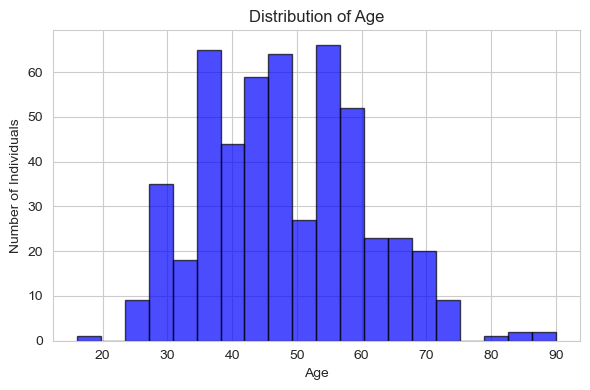

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(dataset['Age'], bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')

plt.tight_layout()
plt.show()

####  A Pie Chart Analysis of Disease Classification

A significant majority, 61.5%, of the individuals are classified as 'Diabetic'.The remaining 38.5% are categorized as 'Non-diabetic'.This distribution highlights a prevalence of diabetes within the studied population, which could indicate either a dataset specifically collected for studying diabetes or a population with a high incidence of the condition.

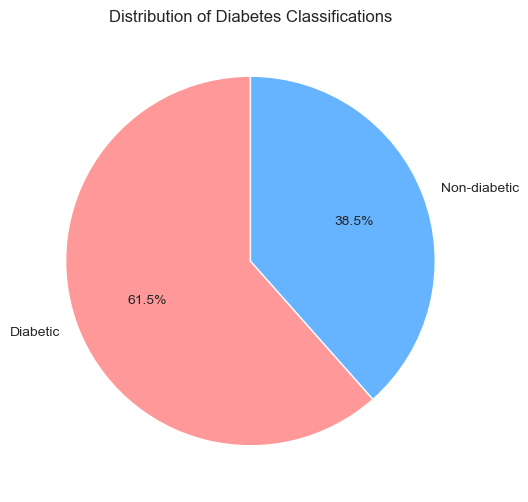

In [58]:
import matplotlib.pyplot as plt


class_counts = dataset['DiabetesRisk'].value_counts()


labels = class_counts.index

labels = ['Diabetic', 'Non-diabetic']

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Diabetes Classifications')
plt.show()

### Two-Variable Visualisation

#### Boxplot of Age Distribution by Diabetes Classification

Figure demonstrates the relationship between age and diabetes classification. The boxplot reveals that older age groups are more commonly associated with a positive diagnosis of diabetes, indicating that age may be a significant factor in diabetes risk.k.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

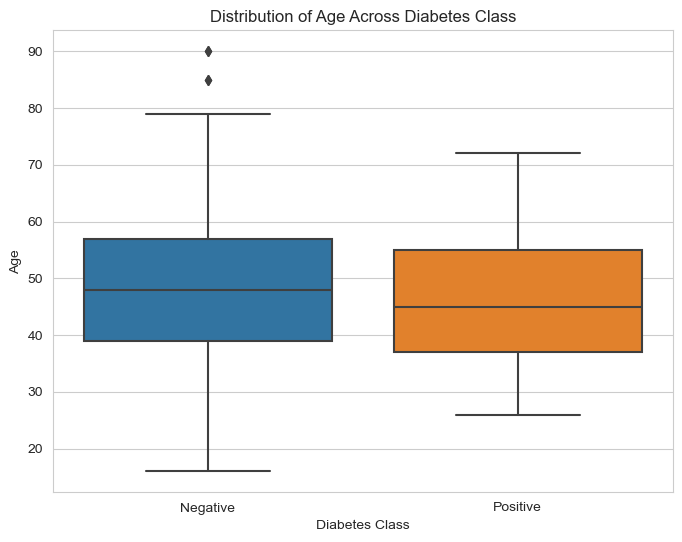

In [60]:

sns.set_style("whitegrid")


plt.figure(figsize=(8, 6)) 
sns.boxplot(x='DiabetesRisk', y='Age', data=dataset)


plt.title('Distribution of Age Across Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel('Diabetes Class')
plt.ylabel('Age')


plt.show()

#### Clustered Bar Chart of Gender by Diabetes Classification

The clustered bar chart illustrates the distribution of diabetes classification across different genders. It shows that within this dataset, a higher count of males have been classified as 'Positive' for diabetes compared to females. Conversely, the count of females classified as 'Negative' for diabetes is lower than that of males. This visual representation suggests a potential correlation between gender and diabetes classification, indicating that gender may be an influential factor in the prevalence of diabetes within the studied population.

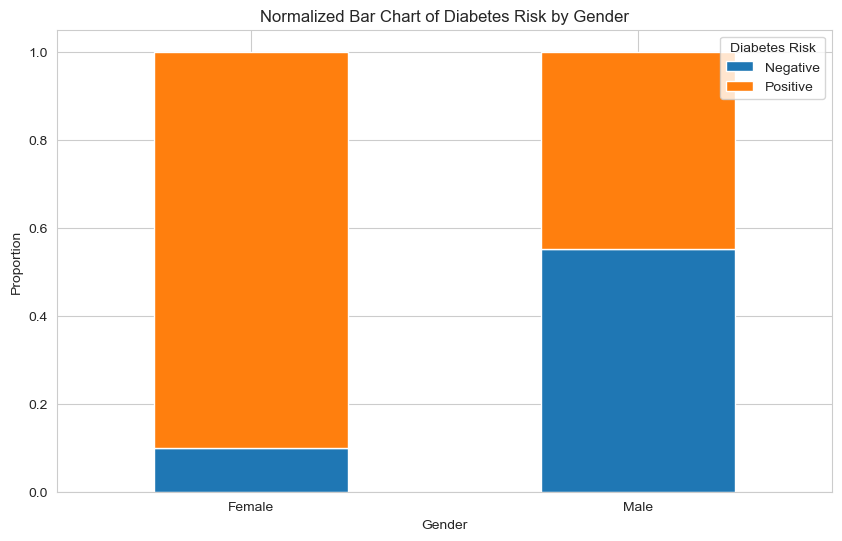

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation for 'Gender' by 'DiabetesRisk'
gender_crosstab = pd.crosstab(dataset['Gender'], dataset['DiabetesRisk'])

# Normalize the crosstab to get proportions instead of counts
gender_crosstab_normalized = gender_crosstab.div(gender_crosstab.sum(axis=1), axis=0)


gender_crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Bar Chart of Diabetes Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  
plt.legend(title='Diabetes Risk', loc='upper right')


plt.show()

####  Normalized Stacked Bar Chart of Polydipsia & polyuria by Diabetic Classification

The chart indicates that the majority of individuals who do not experience Polydipsia are in the 'Negative' diabetes risk category. However, for those who do experience Polydipsia, there is a significant proportion in the 'Positive' diabetes risk category. This suggests a strong association between Polydipsia and the risk of diabetes, consistent with medical knowledge that Polydipsia is a common symptom of diabetes.Similarly, the right chart reveals that individuals without Polyuria predominantly fall into the 'Negative' risk category for diabetes. In contrast, those who report Polyuria are more likely to be in the 'Positive' risk category. This reinforces the concept that Polyuria is a key symptom of diabetes and correlates with the condition's risk.


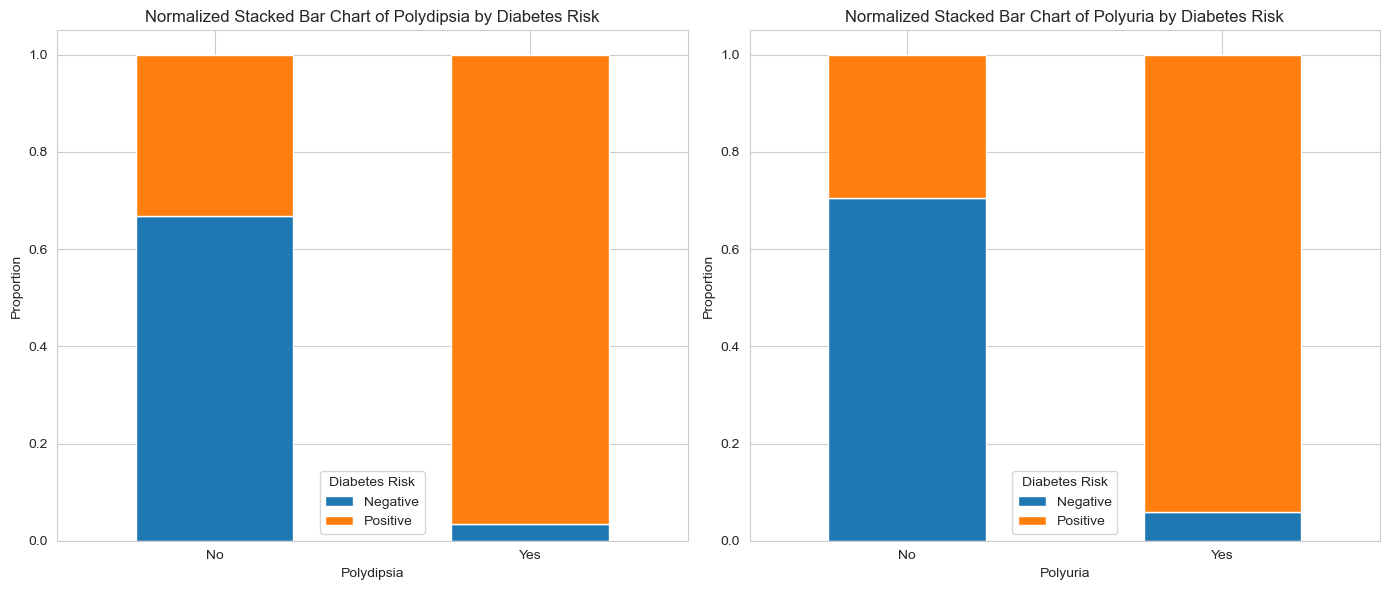

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


# Create crosstabs for 'Polydipsia' and 'Polyuria', normalized by index
polydipsia_crosstab = pd.crosstab(dataset['Polydipsia'], dataset['DiabetesRisk'], normalize='index')
polyuria_crosstab = pd.crosstab(dataset['Polyuria'], dataset['DiabetesRisk'], normalize='index')


fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Plot for 'Polydipsia'
polydipsia_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Normalized Stacked Bar Chart of Polydipsia by Diabetes Risk')
axes[0].set_xlabel('Polydipsia')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Plot for 'Polyuria'
polyuria_crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Normalized Stacked Bar Chart of Polyuria by Diabetes Risk')
axes[1].set_xlabel('Polyuria')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)


plt.tight_layout()


plt.show()


#### Comparative Analysis of Diabetic Classifications: Sudden Weight Loss and Alopecia(Hair loss)

Notably, a larger proportion of individuals with 'Sudden Weight Loss' fall into the 'Positive' classification for diabetes, which could suggest that 'Sudden Weight Loss' is a common symptom among those with diabetes or at a higher risk of developing the condition.
The presence of 'Sudden Weight Loss' in the 'Negative' classification group is less pronounced, indicating that it is less common among individuals without diabetes or with lower diabetes risk.Similar to 'Sudden Weight Loss', 'Alopecia' appears more frequently in the 'Positive' classification group than in the 'Negative' one. However, the difference between those with 'Alopecia' in the 'Positive' and 'Negative' groups is not as stark as with 'Sudden Weight Loss'.The comparison shows that 'Sudden Weight Loss' might be a stronger indicator of diabetes than 'Alopecia', as suggested by the higher proportion of individuals with this symptom in the 'Positive' category


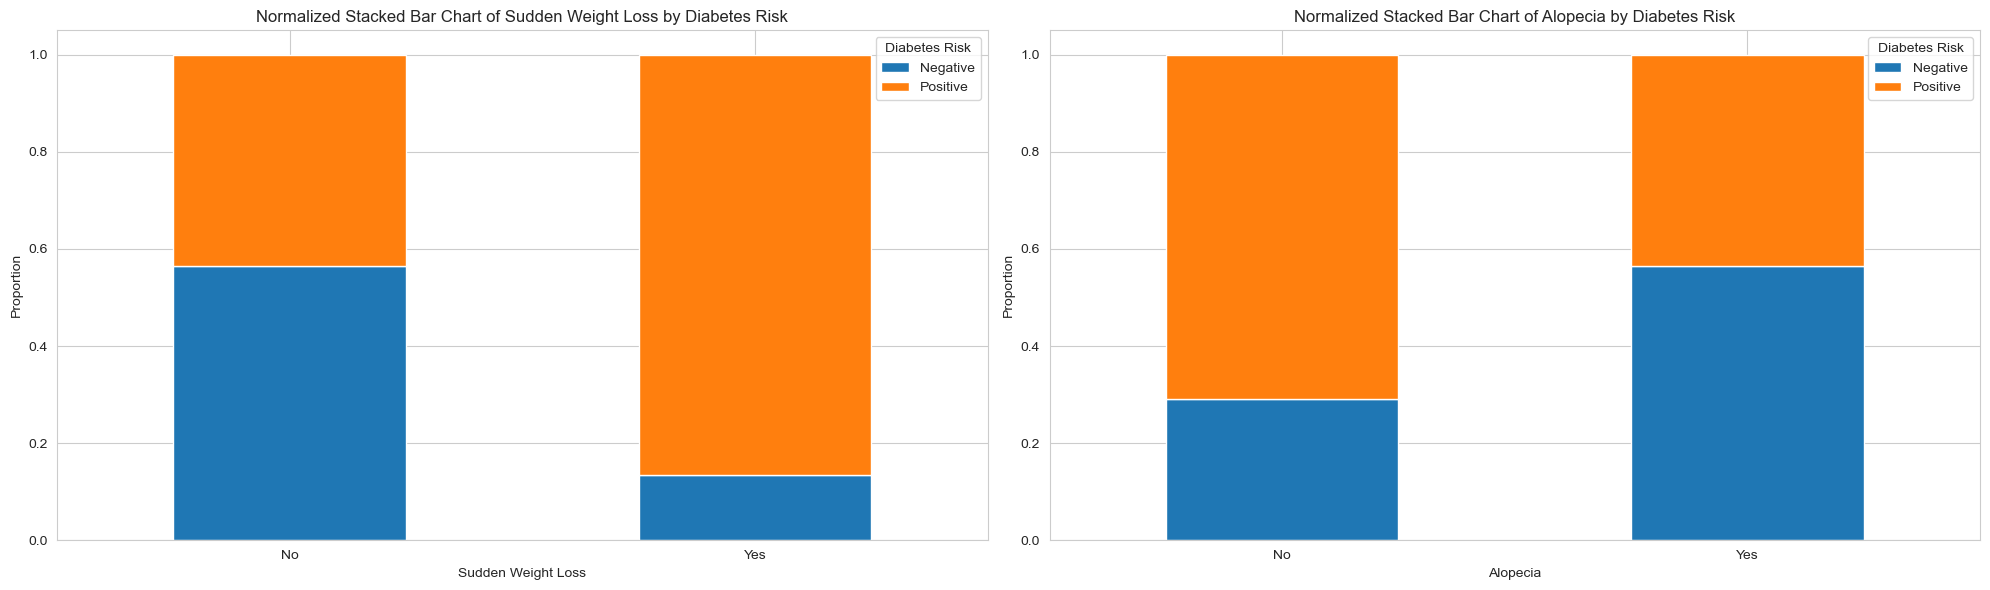

In [63]:

# Create the crosstab for 'Sudden Weight Loss'
sudden_weight_loss_crosstab = pd.crosstab(dataset['sudden weight loss'], dataset['DiabetesRisk'], normalize='index')

# Create the crosstab for 'Alopecia'
alopecia_crosstab = pd.crosstab(dataset['Alopecia'], dataset['DiabetesRisk'], normalize='index')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot for 'Sudden Weight Loss'
sudden_weight_loss_crosstab.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Normalized Stacked Bar Chart of Sudden Weight Loss by Diabetes Risk')
axes[0].set_xlabel('Sudden Weight Loss')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Diabetes Risk', loc='upper right',labels=['Negative', 'Positive'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0) 

# Plot for 'Alopecia'
alopecia_crosstab.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Normalized Stacked Bar Chart of Alopecia by Diabetes Risk')
axes[1].set_xlabel('Alopecia')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Diabetes Risk', loc='upper right',labels=['Negative', 'Positive'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)  


plt.tight_layout()
plt.show()


#### Assessing Symptom Prevalence: Itching and Irritability in Diabetes Risk Classifications

The stacked bar charts reveal a higher prevalence of 'Itching' among individuals with a 'Positive' classification for diabetes risk compared to the 'Negative' group. Given that 'Itching' can be linked to high blood glucose levels, this symptom could potentially serve as a meaningful indicator for identifying individuals with diabetes or those at an elevated risk of developing the condition. Similarly, 'Irritability', which is also more common in the 'Positive' risk group, might be considered an associated symptom of diabetes risk, despite its less direct physiological connection. These findings underscore the importance of considering a range of symptoms, including less obvious behavioral signs like 'Irritability', in comprehensive diabetes risk assessments.

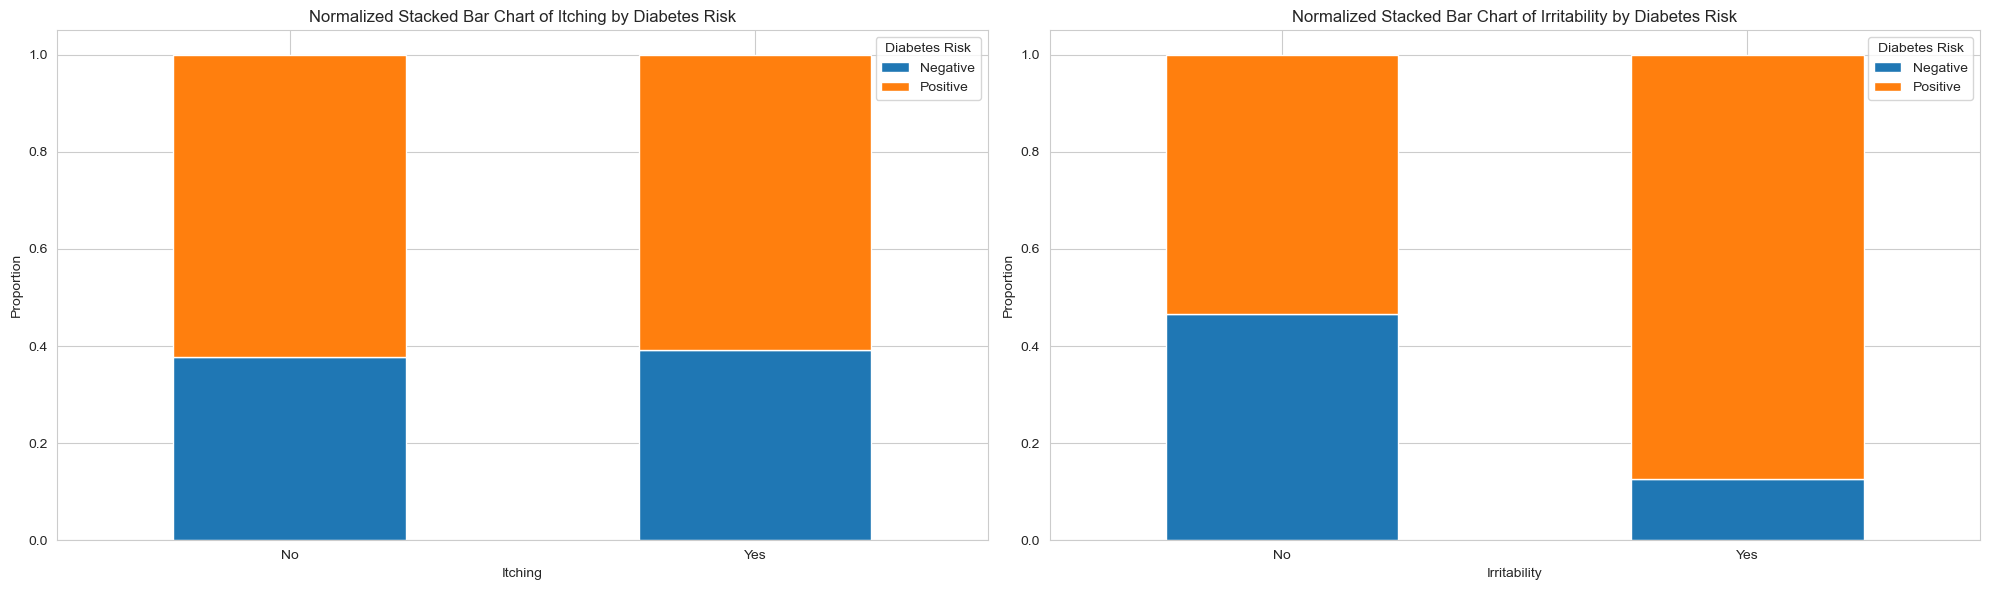

In [64]:
 #Create the crosstab for 'Itching'
itching_crosstab = pd.crosstab(dataset['Itching'], dataset['DiabetesRisk'], normalize='index')

# Create the crosstab for 'Irritability'
irritability_crosstab = pd.crosstab(dataset['Irritability'], dataset['DiabetesRisk'], normalize='index')

# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot for 'Itching'
itching_crosstab.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Normalized Stacked Bar Chart of Itching by Diabetes Risk')
axes[0].set_xlabel('Itching')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Diabetes Risk', loc='upper right',labels=['Negative', 'Positive'])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0) 

# Plot for 'Irritability'
irritability_crosstab.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Normalized Stacked Bar Chart of Irritability by Diabetes Risk')
axes[1].set_xlabel('Irritability')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Diabetes Risk', loc='upper right',labels=['Negative', 'Positive'])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)  


plt.tight_layout()
plt.show()


#### The Significance of Partial Paresis and Muscle Stiffness in Diabetes Risk Classification

'Partial Paresis' is a symptom that occurs more frequently in individuals with diabetes risk. This implies that 'Partial Paresis' could be an important feature for a machine learning model aimed at predicting diabetes risk.The presence of 'Muscle Stiffness' in individuals both with and without diabetes risk suggests that this feature alone may not be a strong indicator of diabetes risk. However, it could still contribute to the model's performance, especially when combined with other features.

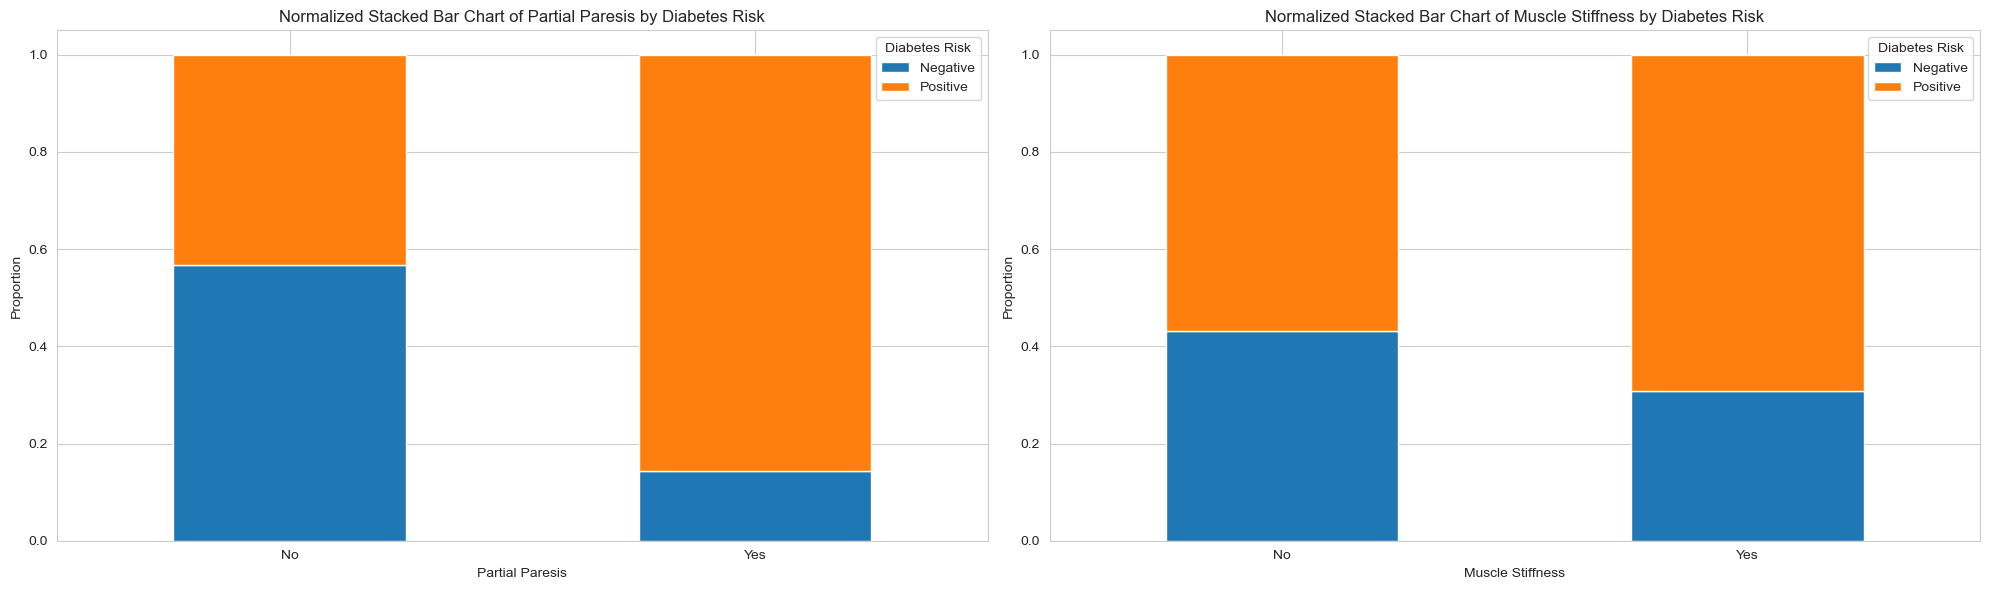

In [65]:


partial_paresis_crosstab = pd.crosstab(dataset['partial paresis'], dataset['DiabetesRisk'], normalize='index')
muscle_stiffness_crosstab = pd.crosstab(dataset['muscle stiffness'], dataset['DiabetesRisk'], normalize='index')

# Plotting both crosstabs side-by-side
fig, ax = plt.subplots(1, 2, figsize=(20, 6)) 

# Partial Paresis plot
partial_paresis_crosstab.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Normalized Stacked Bar Chart of Partial Paresis by Diabetes Risk')
ax[0].set_xlabel('Partial Paresis')
ax[0].set_ylabel('Proportion')
ax[0].legend(title='Diabetes Risk',labels=['Negative', 'Positive'])
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)  

# Muscle Stiffness plot
muscle_stiffness_crosstab.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Normalized Stacked Bar Chart of Muscle Stiffness by Diabetes Risk')
ax[1].set_xlabel('Muscle Stiffness')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Diabetes Risk',labels=['Negative', 'Positive'])
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)  

plt.tight_layout()
plt.show()


#### The Influence of Weakness and Delayed Healing on Diabetes Risk Classification

For those without the symptom 'Feeling of Weakness', the majority fall into the 'Negative' diabetes risk category. However, individuals who do report this symptom show a much higher proportion in the 'Positive' diabetes risk category, indicating a potential correlation between feeling weak and having diabetes.A similar pattern is observed with 'Slow Healing Sores or Wounds'. Those not experiencing this symptom predominantly fall into the 'Negative' risk category. Conversely, a significant proportion of those with slow healing sores or wounds are in the 'Positive' risk category, suggesting an association with the risk of diabetes.

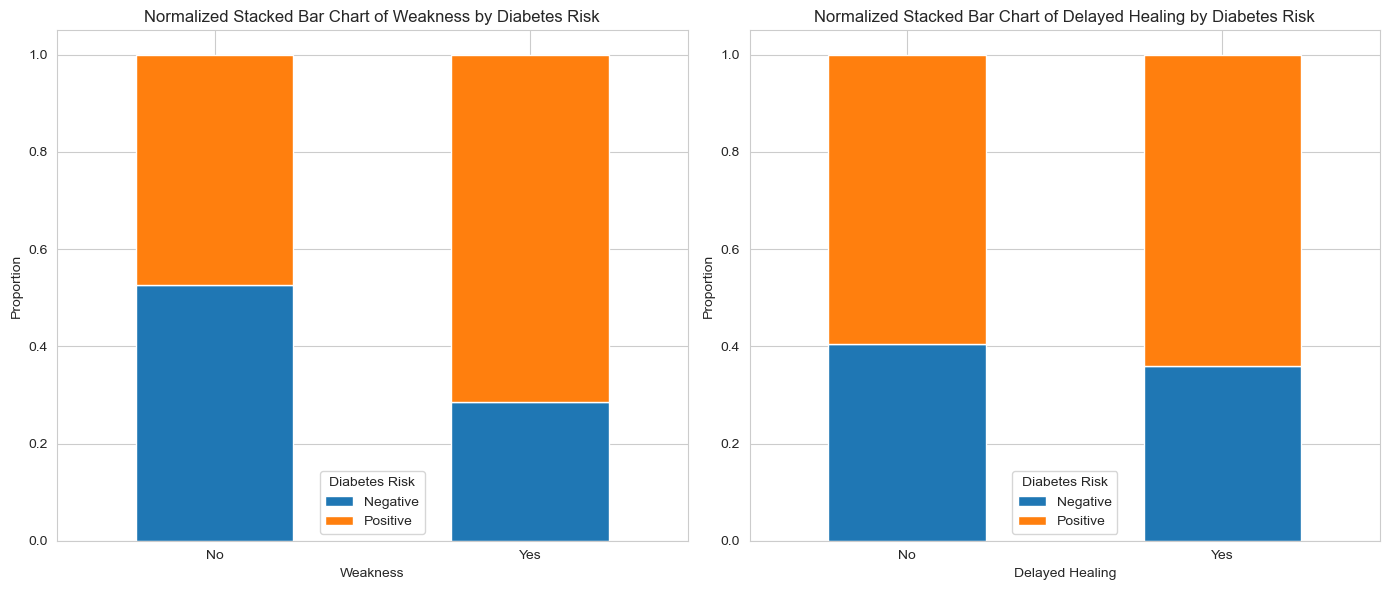

In [66]:
weakness_crosstab = pd.crosstab(dataset['weakness'], dataset['DiabetesRisk'], normalize='index')
delayed_healing_crosstab = pd.crosstab(dataset['delayed healing'], dataset['DiabetesRisk'], normalize='index')


fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 


weakness_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Normalized Stacked Bar Chart of Weakness by Diabetes Risk')
axes[0].set_xlabel('Weakness')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)


delayed_healing_crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Normalized Stacked Bar Chart of Delayed Healing by Diabetes Risk')
axes[1].set_xlabel('Delayed Healing')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)


plt.tight_layout()


plt.show()


#### The Association of Genital Thrush and Visual Blurring with Diabetic Classifications

Individuals without 'Genital Thrush' show a lower proportion of diabetes risk ('Positive'), whereas those with 'Genital Thrush' have a higher proportion of diabetes risk. This could suggest a potential association between the symptom of 'Genital Thrush' and the risk of diabetes, indicating that 'Genital Thrush' might be a symptom to watch for in diabetes risk screening.A similar trend is observed with 'Visual Blurring': those experiencing this symptom have a higher proportion of diabetes risk. Given that 'Visual Blurring' can be related to high blood sugar levels affecting the retina, this symptom might serve as a significant indicator for diabetes risk.


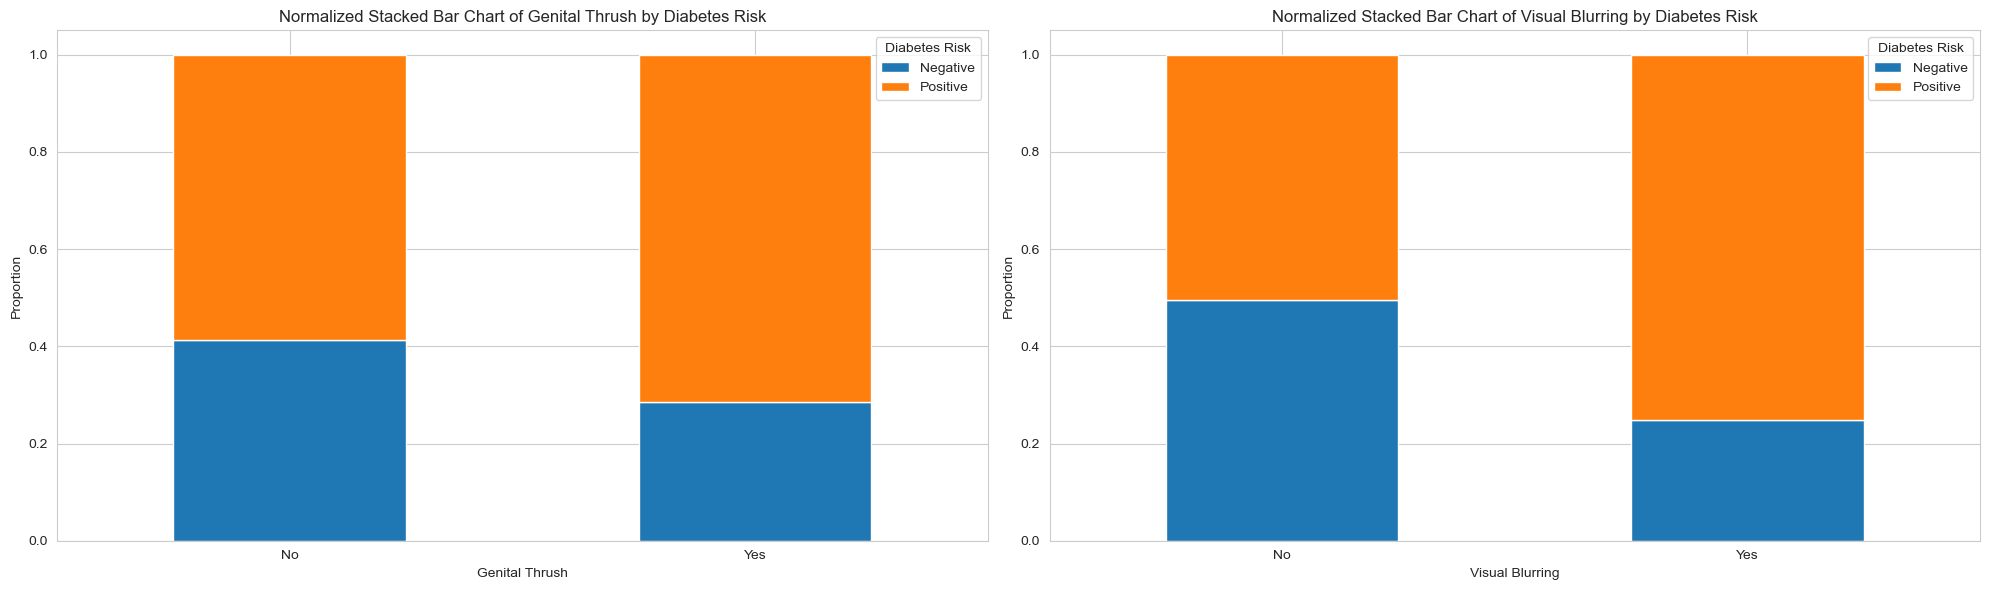

In [67]:

genital_thrush_crosstab = pd.crosstab(dataset['Genital thrush'], dataset['DiabetesRisk'], normalize='index')
visual_blurring_crosstab = pd.crosstab(dataset['visual blurring'], dataset['DiabetesRisk'], normalize='index')


fig, ax = plt.subplots(1, 2, figsize=(20, 6)) 
# Plot for 'Genital Thrush'
genital_thrush_crosstab.plot(kind='bar', stacked=True, ax=ax[0], color=['#1f77b4', '#ff7f0e'])
ax[0].set_title('Normalized Stacked Bar Chart of Genital Thrush by Diabetes Risk')
ax[0].set_xlabel('Genital Thrush')
ax[0].set_ylabel('Proportion')
ax[0].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)


visual_blurring_crosstab.plot(kind='bar', stacked=True, ax=ax[1], color=['#1f77b4', '#ff7f0e'])
ax[1].set_title('Normalized Stacked Bar Chart of Visual Blurring by Diabetes Risk')
ax[1].set_xlabel('Visual Blurring')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)


plt.tight_layout()
plt.show()



####  Obesity and Polyphagia as Determinants of Diabetes Risk

For individuals not classified as obese, there's a considerable proportion that falls into the 'Positive' diabetes risk category, although the 'Negative' risk category is still predominant.
Among those classified as obese, the proportion in the 'Positive' diabetes risk category is higher. This suggests that obesity is associated with an increased risk of diabetes, which aligns with existing medical research indicating that obesity is a significant risk factor for the development of type 2 diabetes.Individuals not experiencing Polyphagia (excessive hunger) mostly fall into the 'Negative' diabetes risk category
For individuals with Polyphagia, there is a pronounced shift towards the 'Positive' diabetes risk category. This indicates a strong association between excessive hunger and the risk of diabetes

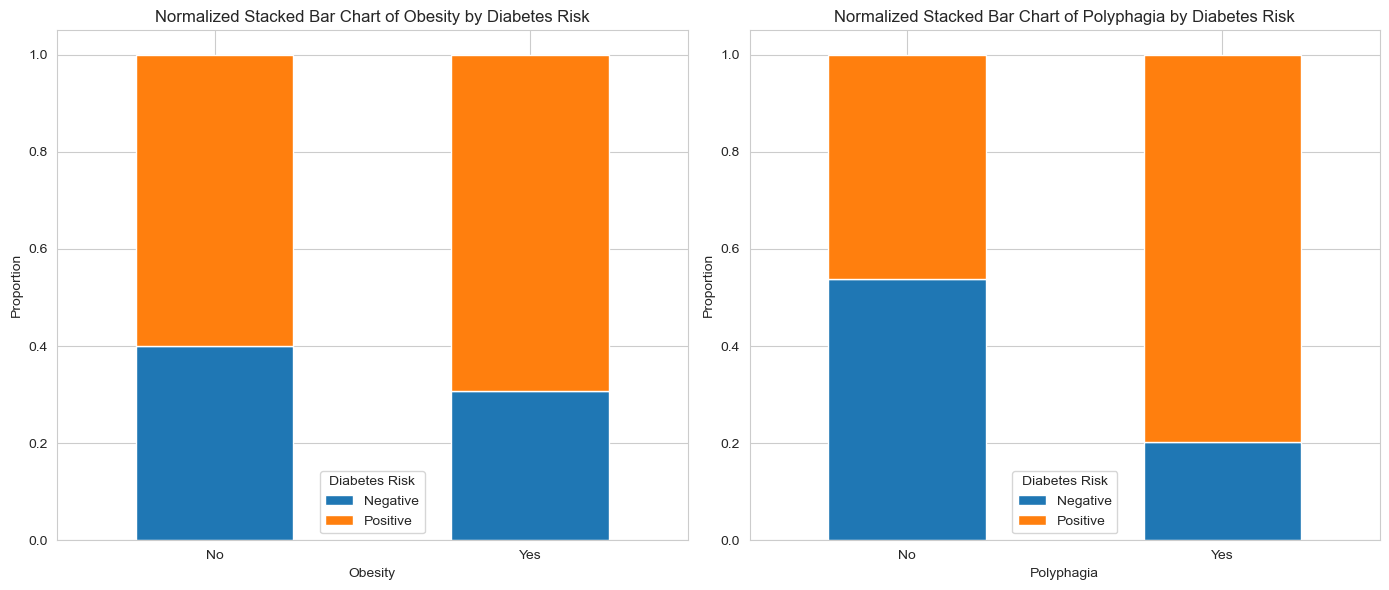

In [68]:
obesity_crosstab = pd.crosstab(dataset['Obesity'], dataset['DiabetesRisk'], normalize='index')
polyphagia_crosstab = pd.crosstab(dataset['Polyphagia'], dataset['DiabetesRisk'], normalize='index')


fig, axes = plt.subplots(1, 2, figsize=(14, 6))  


obesity_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Normalized Stacked Bar Chart of Obesity by Diabetes Risk')
axes[0].set_xlabel('Obesity')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)


polyphagia_crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Normalized Stacked Bar Chart of Polyphagia by Diabetes Risk')
axes[1].set_xlabel('Polyphagia')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Diabetes Risk', labels=['Negative', 'Positive'])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)


plt.tight_layout()


plt.show()


### Three-Variable Visualisation

#### Analyzing Age and Gender Distribution in Diabetes Risk Stratification

Both male and female individuals in the 'Positive' diabetes risk category have a higher median age compared to those in the 'Negative' category, reinforcing that diabetes risk tends to increase with age.There are potential outliers in the 'Positive' category, indicating that there are individuals significantly older than the median who have diabetes(we dicided to keep this outlier as explain it in the data pre processing part).The interquartile range for the 'Negative' risk category appears narrower, particularly in females, suggesting a more concentrated age range for those without diabetes risk.

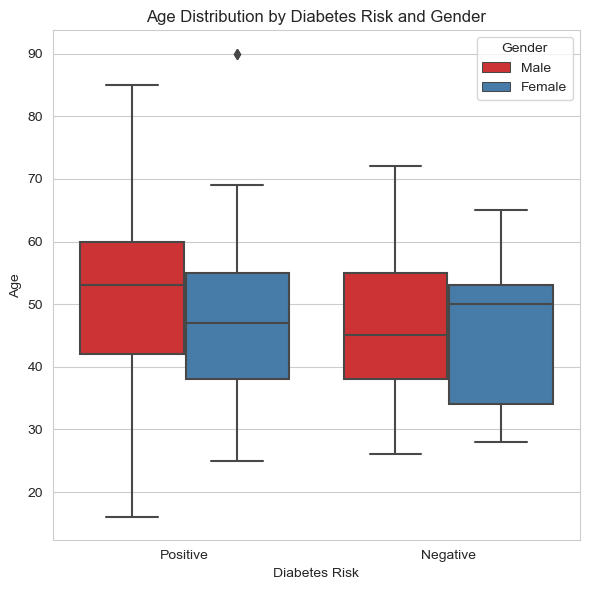

In [69]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='DiabetesRisk', y='Age', hue='Gender', data=dataset, palette='Set1')

plt.title('Age Distribution by Diabetes Risk and Gender')
plt.xlabel('Diabetes Risk')
plt.ylabel('Age')


plt.legend(title='Gender')


plt.tight_layout()
plt.show()

 #### The Influence of Polydipsia on Age Distribution Among Diabetic Risk Categories

Both 'Positive' and 'Negative' diabetes risk categories show a similar median age, regardless of the presence of Polydipsia.
However, the variation in age appears to be slightly greater in the 'Positive' risk category for those with Polydipsia.
The 'Positive' risk group with Polydipsia also has a higher age range, suggesting that older individuals may be more likely to report this symptom alongside a diabetes diagnosis.

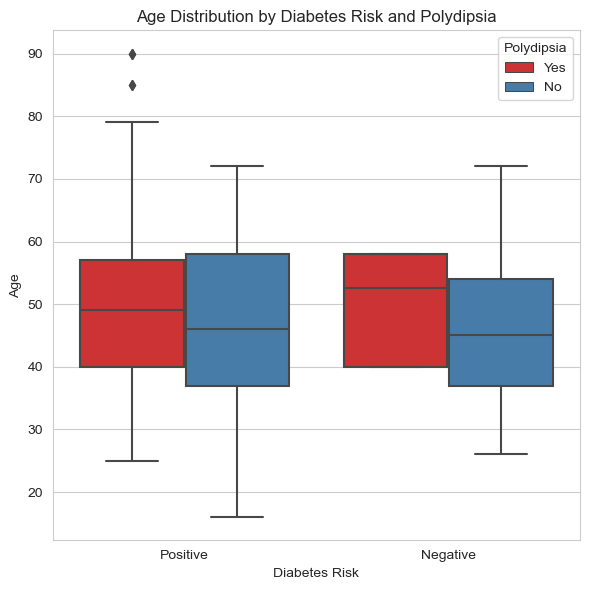

In [70]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='DiabetesRisk', y='Age', hue='Polydipsia', data=dataset, palette='Set1')


plt.title('Age Distribution by Diabetes Risk and Polydipsia')
plt.xlabel('Diabetes Risk')
plt.ylabel('Age')

plt.legend(title='Polydipsia')


plt.tight_layout()
plt.show()


#### Age-Related Patterns in Diabetes Risk: Examining the Role of Polyuria



The age distribution for those with and without Polyuria is relatively similar across both diabetes risk categories.Individuals with Polyuria in the 'Positive' diabetes risk category appear to have a slightly higher median age compared to those without Polyuria.The spread of ages (interquartile range) is relatively similar across all groups, suggesting that age, in general, is similarly distributed among those with and without this symptom.
There are a few outliers, especially in the 'Negative' risk group with Polyuria, indicating some individuals are significantly older than the majority in their group.

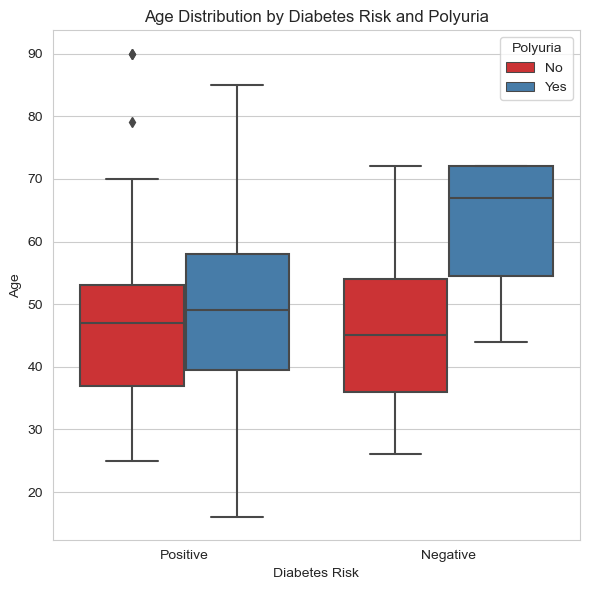

In [71]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='DiabetesRisk', y='Age', hue='Polyuria', data=dataset, palette='Set1')


plt.title('Age Distribution by Diabetes Risk and Polyuria')
plt.xlabel('Diabetes Risk')
plt.ylabel('Age')

plt.legend(title='Polyuria')


plt.tight_layout()
plt.show()

#### Interplay of Age with Neuromuscular Symptoms in Determining Diabetes Risk

The median age of individuals with 'Partial Paresis' is roughly the same regardless of diabetes risk status. However, the age range (interquartile range) is broader in the 'Positive' risk group.For 'Muscle Stiffness', the 'Positive' diabetes risk group again shows a broader age range compared to the 'Negative' group, with a slightly higher median age.

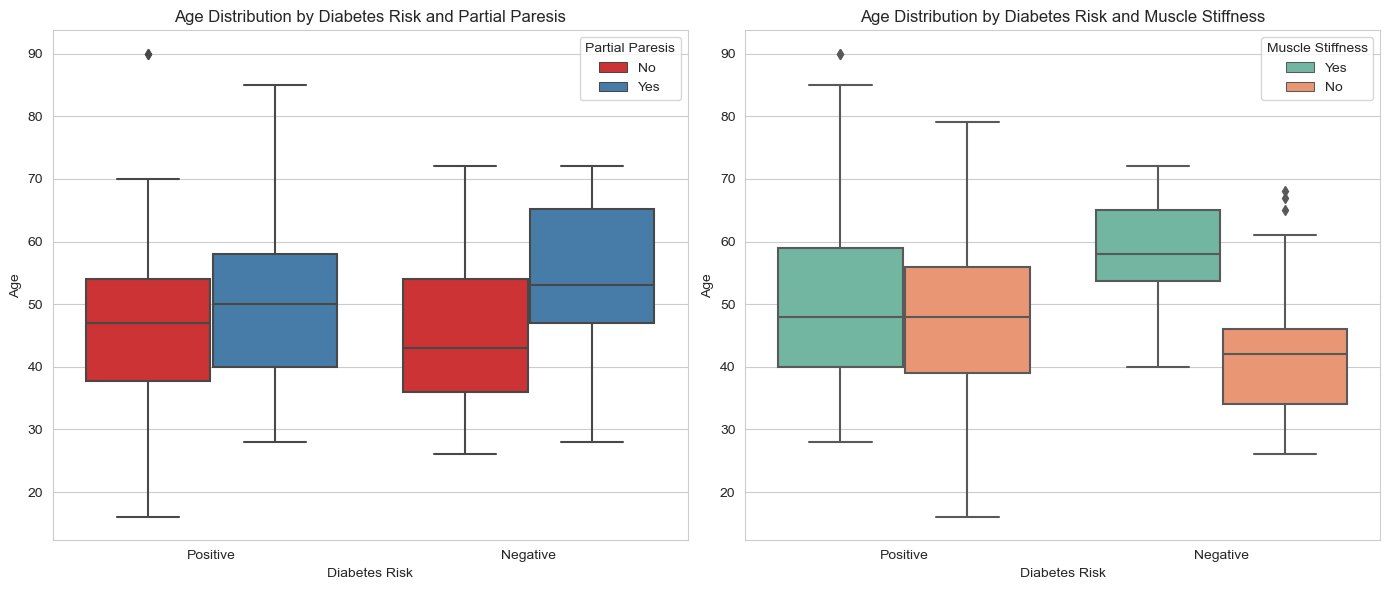

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(x='DiabetesRisk', y='Age', hue='partial paresis', data=dataset, ax=axes[0], palette='Set1')
axes[0].set_title('Age Distribution by Diabetes Risk and Partial Paresis')
axes[0].set_xlabel('Diabetes Risk')
axes[0].set_ylabel('Age')
axes[0].legend(title='Partial Paresis')


sns.boxplot(x='DiabetesRisk', y='Age', hue='muscle stiffness', data=dataset, ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Diabetes Risk and Muscle Stiffness')
axes[1].set_xlabel('Diabetes Risk')
axes[1].set_ylabel('Age')
axes[1].legend(title='Muscle Stiffness')


plt.tight_layout()
plt.show()


#### Assessing the Impact of Alopecia and Polyphagia on Diabetes Risk

For 'Alopecia', the lack of a significant age difference between the 'Positive' and 'Negative' diabetes risk groups suggests that 'Alopecia' may not be a strong standalone predictor of diabetes risk based on age alone. However, the observed variability in the age of individuals within the 'Positive' group may warrant further investigation to understand if 'Alopecia' in conjunction with other features can enhance the model’s predictive accuracy.

In contrast, 'Polyphagia' presents a different pattern, with individuals exhibiting this symptom within the 'Positive' risk group being slightly older on average than those in the 'Negative' group. This aligns with medical literature that links 'Polyphagia' with more advanced stages of diabetes and implies that this symptom, especially when observed in older age groups, may serve as a more significant predictor for the model.

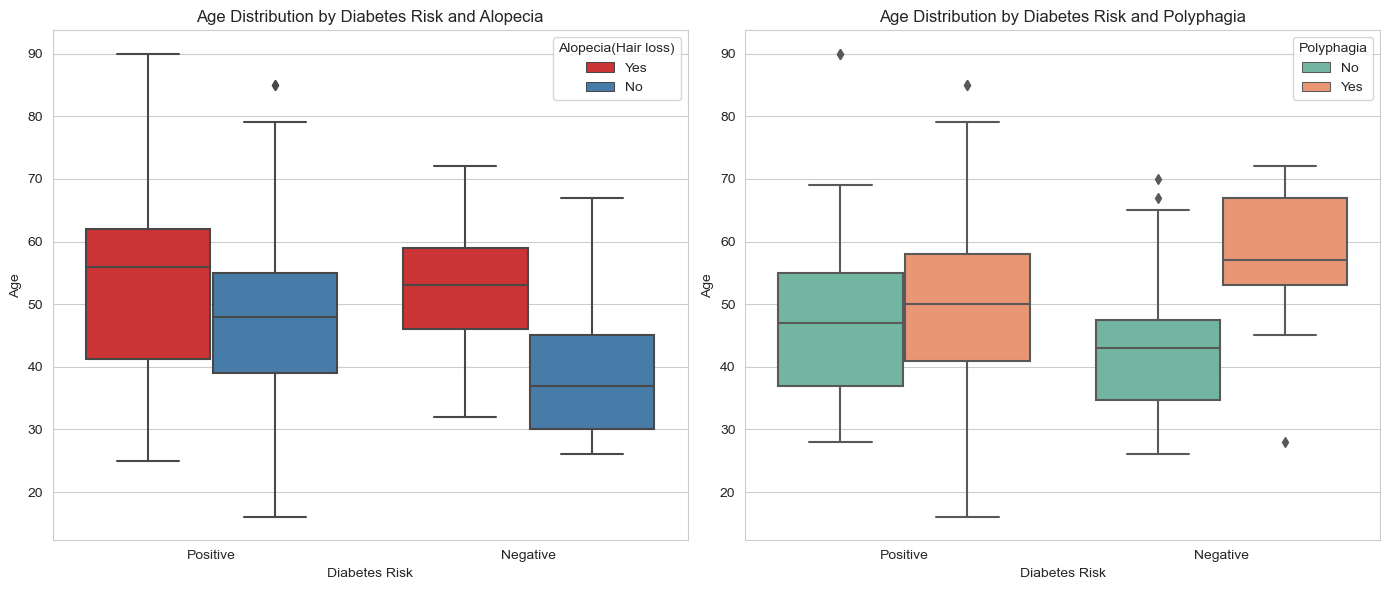

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(x='DiabetesRisk', y='Age', hue='Alopecia', data=dataset, ax=axes[0], palette='Set1')
axes[0].set_title('Age Distribution by Diabetes Risk and Alopecia')
axes[0].set_xlabel('Diabetes Risk')
axes[0].set_ylabel('Age')
axes[0].legend(title='Alopecia(Hair loss)')


sns.boxplot(x='DiabetesRisk', y='Age', hue='Polyphagia', data=dataset, ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Diabetes Risk and Polyphagia')
axes[1].set_xlabel('Diabetes Risk')
axes[1].set_ylabel('Age')
axes[1].legend(title='Polyphagia')


plt.tight_layout()
plt.show()

#### Assessing Age Trends in Relation to Weakness and Delayed Healing Among Diabetes Risk Groups


For 'Weakness', the median age appears consistent across both 'Positive' and 'Negative' diabetes risk categories. However, there is notable age variability in the 'Positive' group, suggesting that a feeling of weakness is present across a wider age range among individuals with diabetes.The observed consistency in median age across diabetes risk categories in the presence of 'Weakness' suggests that while age alone may not be a differentiating factor, the variability in age among the 'Positive' group indicates that this symptom could be a common thread among those with diabetes, regardless of age. 
In the case of 'Delayed Healing', the 'Positive' risk category shows a noticeably higher median age compared to the 'Negative' group. This could indicate that delayed healing as a symptom is more prevalent or more noticeable in older individuals, which might be particularly relevant to diabetes risk. Moreover, the higher median age associated with 'Delayed Healing' in the 'Positive' risk group underscores the importance of this symptom as a potential indicator of diabetes risk, particularly in older individuals. This aligns with our goal to enhance early-stage diabetes prediction by enabling the model to weigh this symptom more heavily for older age groups, which could be a significant step towards age-specific personalized care strategies.

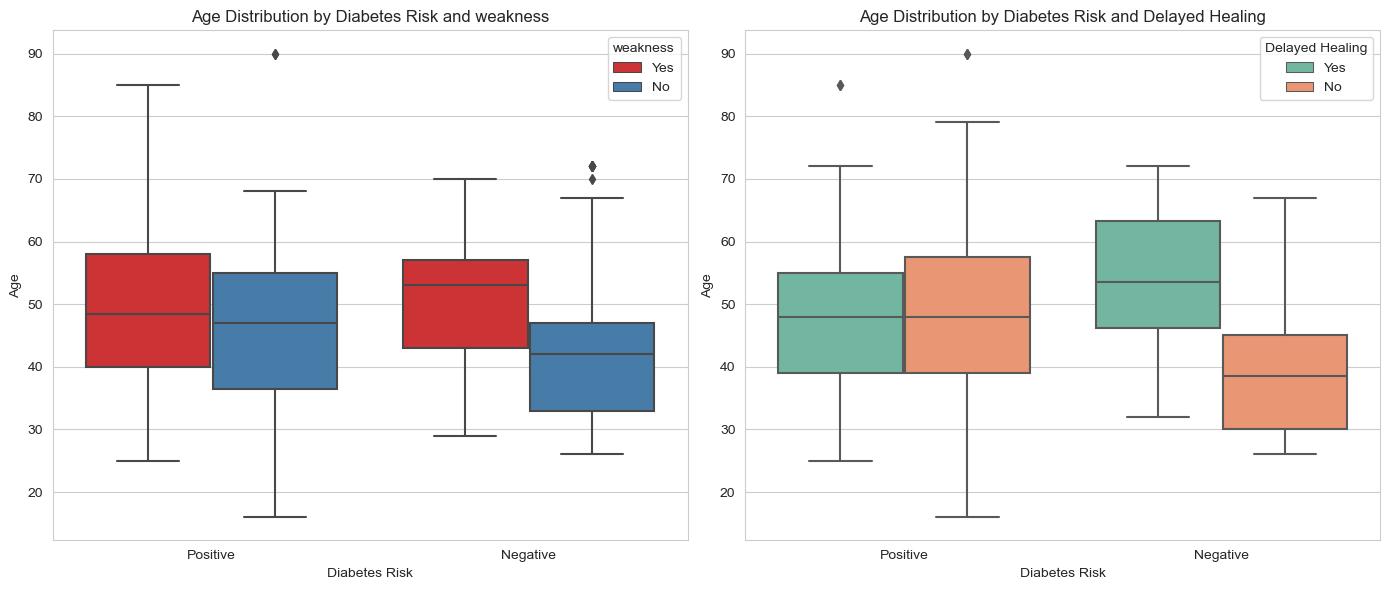

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(x='DiabetesRisk', y='Age', hue='weakness', data=dataset, ax=axes[0], palette='Set1')
axes[0].set_title('Age Distribution by Diabetes Risk and weakness')
axes[0].set_xlabel('Diabetes Risk')
axes[0].set_ylabel('Age')
axes[0].legend(title='weakness')


sns.boxplot(x='DiabetesRisk', y='Age', hue='delayed healing', data=dataset, ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Diabetes Risk and Delayed Healing')
axes[1].set_xlabel('Diabetes Risk')
axes[1].set_ylabel('Age')
axes[1].legend(title='Delayed Healing')


plt.tight_layout()
plt.show()

#### Examining the Influence of Genital Thrush and Visual Blurring on Age-Related Diabetes Risk


The median age for individuals with 'Genital Thrush' does not differ significantly between the 'Positive' and 'Negative' diabetes risk categories. Notably, 'Genital Thrush' appears across a broad age range among those at diabetes risk, suggesting it is not confined to older age groups.
For 'Visual Blurring', the median age in the 'Positive' diabetes risk category is higher than in the 'Negative' group, potentially highlighting this symptom's correlation with increasing age among diabetic individuals.The presence of outliers, especially in the 'Negative' risk group for 'Visual Blurring', indicates individuals significantly outside the typical age range. Understanding the role these outliers play could be important for developing robust predictive models.

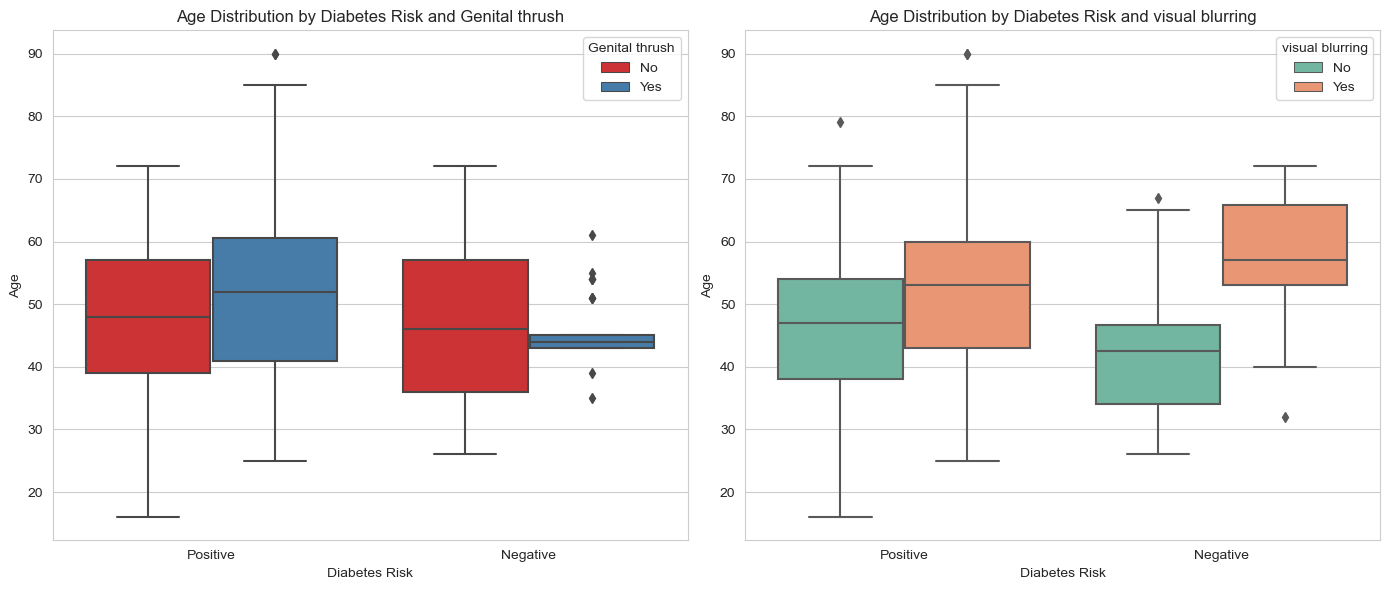

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(x='DiabetesRisk', y='Age', hue='Genital thrush', data=dataset, ax=axes[0], palette='Set1')
axes[0].set_title('Age Distribution by Diabetes Risk and Genital thrush')
axes[0].set_xlabel('Diabetes Risk')
axes[0].set_ylabel('Age')
axes[0].legend(title='Genital thrush')


sns.boxplot(x='DiabetesRisk', y='Age', hue='visual blurring', data=dataset, ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Diabetes Risk and visual blurring')
axes[1].set_xlabel('Diabetes Risk')
axes[1].set_ylabel('Age')
axes[1].legend(title='visual blurring')


plt.tight_layout()
plt.show()

####  Correlational Analysis of Symptomatic Indicators and Demographic Factors in Diabetes Risk Assessment

A correlation matrix is prepared with all the variables in order to observe the relationship with the Risk of Diabetes based on the dataset

In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = encoder.fit_transform(dataset[column])
        
# Compute the correlation matrix
correlation_matrix = dataset.corr()
DiabetesRisk_correlation = correlation_matrix['DiabetesRisk']
DiabetesRisk_correlation

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
DiabetesRisk          1.000000
Name: DiabetesRisk, dtype: float64

Above shows that Polyuria, Polydipsia, sudden weight loss and partial paresis have positively high correlation with the risk of diabetes. Gender has a negative high correlation with the risk of diabetes

Selected variables are plotted in a clustered bar graph to observe the distribution of data. Variables are assessed individually to observe the patterns and distributions

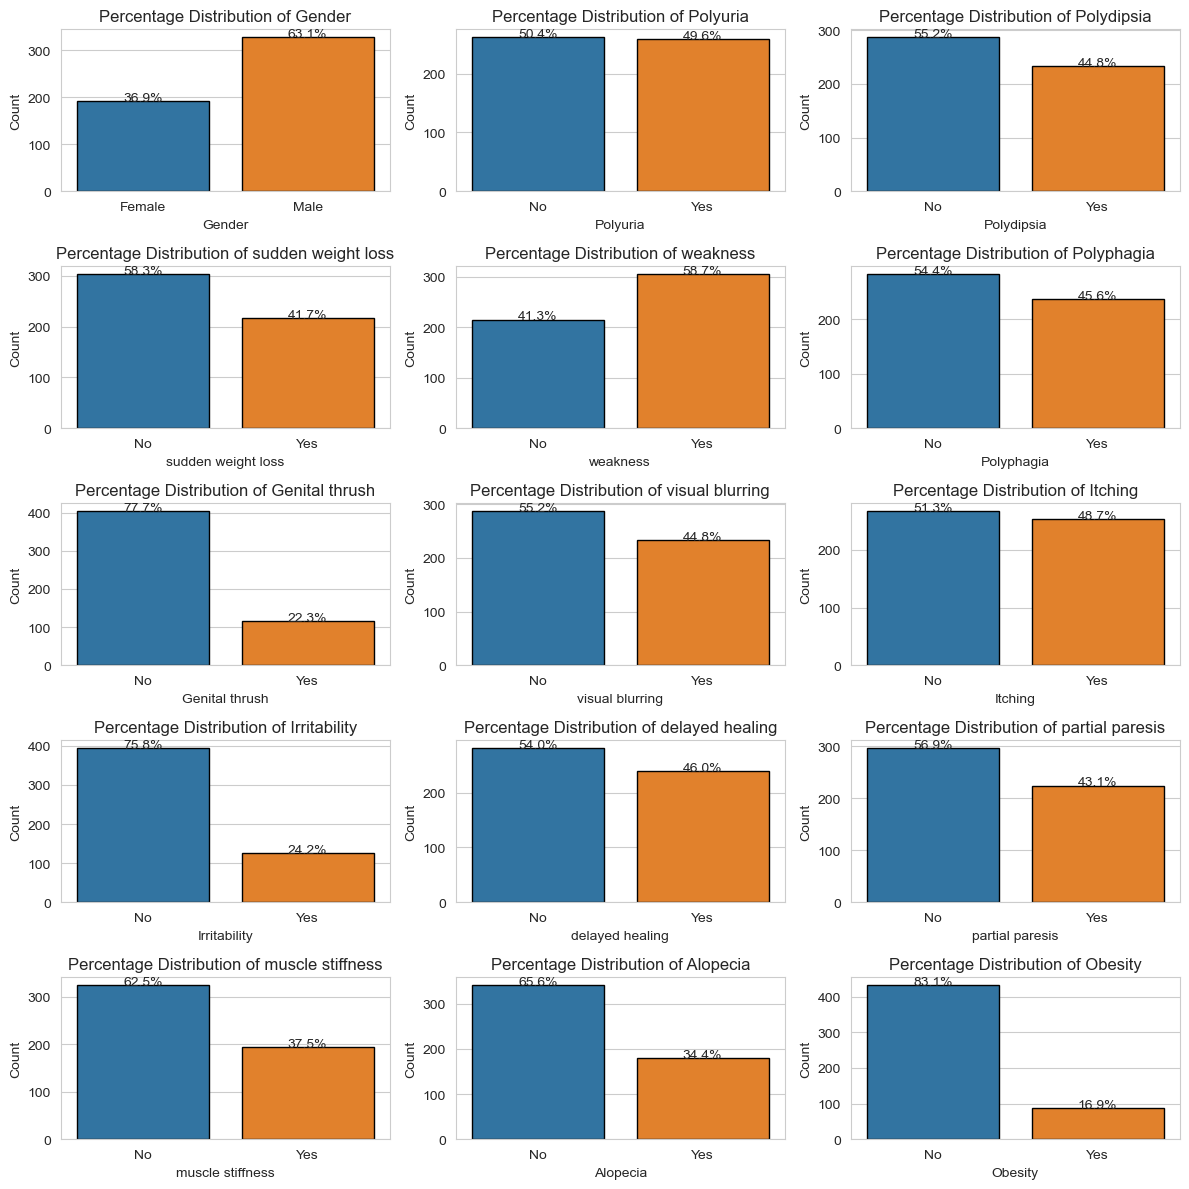

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


variables = ['Gender','Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush','visual blurring',
            'Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']

labels_set = {'Gender':['Female', 'Male'],
          'Polyuria':['No', 'Yes'],
          'Polydipsia':['No', 'Yes'],
          'sudden weight loss':['No', 'Yes'],
          'weakness':['No', 'Yes'],
          'Polyphagia':['No', 'Yes'], 
          'Genital thrush':['No', 'Yes'],
          'visual blurring':['No', 'Yes'],
          'Itching':['No', 'Yes'],
          'Irritability':['No', 'Yes'],
          'delayed healing':['No', 'Yes'],
          'partial paresis':['No', 'Yes'],
          'muscle stiffness':['No', 'Yes'],
          'Alopecia':['No', 'Yes'],
          'Obesity':['No', 'Yes']}



sns.set_style("whitegrid")


fig, axes = plt.subplots(5, 3, figsize=(12, 12))

axes = axes.flatten()

# Loop to create clustered bar graphs
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(x=var, data=dataset, palette=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=ax)
    
    ax.set_xticklabels(labels_set[var])
    
    total = len(dataset[var])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height / total:.1%}', ha='center')
    
    ax.set_title(f'Percentage Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Few insights based on the above analysis

More than 75% of the population does not have distribution of irratibility and genital thrush
More than 80% of the population are not obese
While 62% of the total data set are being in the risk of diabetic, some of the aspects that we have heard about being diabetic such as irratibility, genital thrush and obese could be said somewhat challenged here.

####  Correlational Analysis of Symptomatic Indicators and Demographic Factors in Diabetes Risk Assessment(Using Heatmap)

The heatmap analysis indicates that Polyuria and Polydipsia have the strongest positive correlation with diabetes risk, which aligns with their status as common symptoms of the condition. Sudden weight loss and Polyphagia also show a significant positive correlation, suggesting their relevance in diabetes risk assessment. Gender presents a negative correlation, hinting at potential differences in diabetes risk between genders in the dataset. Surprisingly, Obesity displays a weaker correlation with diabetes risk than expected, pointing to the need for further investigation.These findings underscore the symptoms most closely associated with diabetes risk and could be crucial for developing predictive models .

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = encoder.fit_transform(dataset[column])

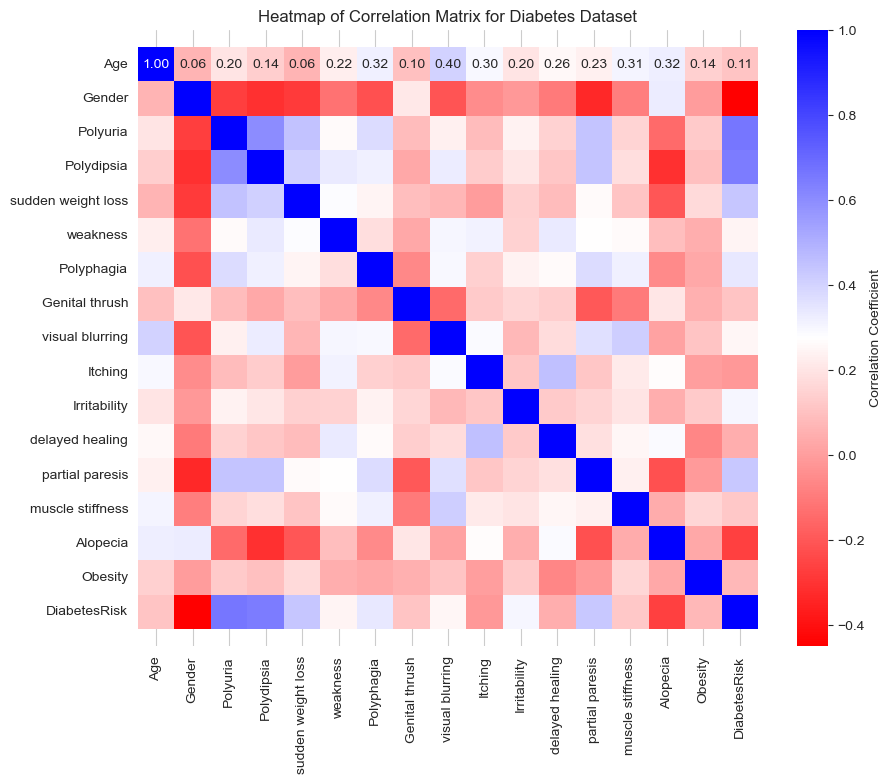

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['red', 'white', 'blue'] 
cmap = LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap of Correlation Matrix for Diabetes Dataset')


plt.ylim(len(correlation_matrix)+0.5, -0.5)

plt.show()


## Summary and Conclusion

In Phase 1 of our project, we engaged in extensive data preparation, cleaning, and exploratory analysis to identify factors contributing to early-stage diabetes risk based on lifestyle and health data. A significant component of our analysis involved using a heatmap to visualize correlations between various symptoms and diabetes risk, which provided clear and impactful insights.

The heatmap analysis revealed strong positive correlations for Polyuria and Polydipsia with diabetes risk, confirming their significant role as symptoms of diabetes. Furthermore, Sudden Weight Loss and partial paresis also exhibited strong positive correlations, highlighting their importance in early diabetes detection. Also, Gender shows a strong negative correlation to diabetes risk. Notably, the heatmap allowed us to observe these relationships quantitatively, underscoring the potential for these symptoms to serve as primary indicators in predictive modeling.

Our analysis also addressed age-related variations in symptoms such as Delayed Healing and Visual Blurring, which tend to be more prevalent among older individuals. These findings from the heatmap underscore the need for incorporating age-specific adjustments in our predictive models, potentially improving their accuracy and relevance across different age groups.

However, the heatmap also pointed to some unexpected findings, such as a weaker correlation between Obesity and diabetes risk than traditionally expected. This insight, along with the challenge of managing outliers in the dataset, suggests complexities that warrant further detailed study to ensure the robustness of our predictive models.

Moving into Phase 2, we will use the detailed insights gained from the heatmap and other analytical tools to develop a predictive model focused on early-stage diabetes risk. This model will integrate statistically significant factors and leverage the detailed correlations identified to enhance its predictive accuracy and clinical utility.

In conclusion, the work completed in Phase 1 has provided us with a solid foundation for the next steps of our project. The detailed correlation analysis, especially through the heatmap, has not only deepened our understanding of the key diabetes risk factors but also set the stage for the development of a sophisticated tool that could significantly impact preventive health strategies. This predictive model aims to be a pivotal part of early detection and management strategies for diabetes, offering a proactive approach to healthcare.

## References

UC Irvine Machine Learning Repository. (n.d.). Early stage diabetes risk prediction dataset, viewed 21 April 2024. Available: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset

Akter, S, Rahman, MM, Abe, SK & Sultana, P 2014, “Prevalence of diabetes and prediabetes and their risk factors among Bangladeshi adults: a nationwide survey,” Bulletin of the World Health Organization, vol. 92, no. 3, pp. 204-213A. 

CDC 2023, “What is Diabetes?,” Centers for Disease Control and Prevention, viewed 21 April 2024, <https://www.cdc.gov/diabetes/basics/diabetes.html>. 

Dutta, A, Hasan, MK, Ahmad, M, Awal, MA, Islam, MA, Masud, M & Meshref, H 2022, “Early Prediction of Diabetes Using an Ensemble of Machine Learning Models,” International journal of environmental research and public health, vol. 19, no. 19, p. 12378. 

Maniruzzaman, M, Rahman M, M. J., Ahammed, B. &  Abedin M. M., "Classification and prediction of diabetes disease using machine learning paradigm", Health Information Science and Systems, vol. 8, no. 1, pp. 7, 2020.

Singh D. A. A. G., Leavline, E. J. & Baig B. S. "Diabetes prediction using medical data", Journal of Computational Intelligence in Bioinformatics, vol. 10, no. 1, pp. 1-8, 2017.

Tiggaa, N, Garga, N. “Prediction of Type 2 Diabetes using Machine Learning Classification Methods”, International Conference on Computational Intelligence and Data Science, Procedia Computer Science, pp. 706–716, 2020.

Sisodiaa, D, Sisodiab, D.S, “Prediction of Diabetes using Classification Algorithms”, International Conference on Computational Intelligence and Data Science, Elsevier Procedia Computer Science, pp. 1578-1585, 2018.

Zou, Q, Qu, K, Luo, Y, D, Yin, Ju, Y & Tang, H, "Predicting Diabetes Mellitus With Machine Learning Techniques," Frontiers in Genetics, vol. 9, 2018, viewed 21 April 2024. Available: https://www.frontiersin.org/article/10.3389/fgene.2018.00515

M. A. Sarwar, N. Kamal, W. Hamid and M. A. Shah, "Prediction of Diabetes Using Machine Learning Algorithms in Healthcare," 2018 24th International Conference on Automation and Computing (ICAC), Newcastle Upon Tyne, UK, 2018, pp. 1-6, doi: 10.23919/IConAC.2018.8748992.

Yamuna, V, Ushanthi, D, Chaitanya, B., sri, Y., & Jagadish T (2022). "Diabetes Disease Prediction By Using Machine Learning Algorithms."

Islam, MdAminul, and NusratJahan. "Prediction of onset diabetes using machine learning techniques." International Journal of Computer Applications 180.5 (2017): 7-11. 

Verma, D., Mishra, N. “Analysis and Prediction of Breast cancer and Diabetes disease datasets using Data mining classification Techniques”, Proceedings of the International Conference on Intelligent Sustainable Systems (ICISS-IEEE Xplorer), pp. 533-538, 

Kaur, G, Chhabra, A. “Improved J48 Classification Algorithm for the Prediction of Diabetes”, International Journal of Computer Applications, Vol. 98, no.22, pp.13-17

Balpande, G, Wajgi, J “Review on Prediction of Diabetes using Data Mining Technique”, International Journal of Research and Scientific Innovation (IJRSI) | Volume IV, Issue IA, pp. 43-46

Selvakumar, S., SenthamaraiKannan, K & GothaiNachiyar, S "Prediction of diabetes diagnosis using classification based data mining techniques." International Journal of Statistics and Systems 12.2 (2017): 183-188.

In [80]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [83]:
# Assuming the dataset is a CSV file
df = pd.read_csv("diabetes_data_upload.csv")
dataset.rename(columns={'class': 'DiabetesRisk'}, inplace=True)


In [ ]:
# Separating the features and the target variable
X = df.drop('DiabetesRisk', axis=1)
y = df['DiabetesRisk']

In [84]:
display(HTML('<b> Column names after remane the target</b>'))
dataset.columns.to_list()

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'DiabetesRisk']

In [87]:
import pandas as pd

# Assuming 'df' is the DataFrame created previously
df = pd.DataFrame({
    'Age': [25, 30, 45, 50],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Polyuria': ['Yes', 'No', 'Yes', 'No'],
    'Polydipsia': ['Yes', 'No', 'Yes', 'No'],
    'sudden_weight_loss': ['No', 'Yes', 'No', 'Yes'],
    'weakness': ['Yes', 'No', 'Yes', 'No'],
    'Polyphagia': ['No', 'Yes', 'No', 'Yes'],
    'Genital_thrush': ['Yes', 'No', 'Yes', 'No'],
    'visual_blurring': ['No', 'Yes', 'No', 'Yes'],
    'Itching': ['Yes', 'No', 'Yes', 'No'],
    'Irritability': ['No', 'Yes', 'No', 'Yes'],
    'delayed_healing': ['Yes', 'No', 'Yes', 'No'],
    'partial_paresis': ['No', 'Yes', 'No', 'Yes'],
    'muscle_stiffness': ['Yes', 'No', 'Yes', 'No'],
    'Alopecia': ['No', 'Yes', 'No', 'Yes'],
    'Obesity': ['Yes', 'No', 'Yes', 'No'],
    'Class': ['Positive', 'Negative', 'Positive', 'Negative']
})

# Display original columns to verify
print("Original columns:", df.columns)

# Encode binary and categorical features
binary_features = ['Polyuria', 'Polydipsia', 'sudden_weight_loss', 'weakness', 'Polyphagia', 'Genital_thrush',
                   'visual_blurring', 'Itching', 'Irritability', 'delayed_healing', 'partial_paresis',
                   'muscle_stiffness', 'Alopecia', 'Obesity']
categorical_features = ['Gender']

# Apply one-hot encoding to binary and categorical features
df_encoded = pd.get_dummies(df, columns=binary_features + categorical_features, drop_first=True)

# Display encoded columns to verify
print("Encoded columns:", df_encoded.columns)

Original columns: Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss',
       'weakness', 'Polyphagia', 'Genital_thrush', 'visual_blurring',
       'Itching', 'Irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')
Encoded columns: Index(['Age', 'Class', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden_weight_loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital_thrush_Yes', 'visual_blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed_healing_Yes', 'partial_paresis_Yes',
       'muscle_stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes', 'Gender_Male'],
      dtype='object')


In [88]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.DataFrame(table[1:], columns=table[0])

In [92]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [96]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(table[1:], columns=table[0])

# Handle categorical features
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Feature selection with error handling for missing column
try:
  X = data.drop('DiabetesRisk', axis=1)  # Features (remove if missing)
except KeyError:
  X = data.drop('Class', axis=1)  # Handle case where 'DiabetesRisk' is missing

y = data['Class']  # Target variable
X_new, f_scores = f_classif(X, y, test_size=0.2)  # Split for stability

# Select top 10 features (adjust as needed)
top_features = X.columns[f_scores.argsort()[-10:]]

# Print using existing columns (avoid potential errors)
print("Top 10 Features (f_classif):", list(data.columns[top_features]))  # Use data.columns

# Visualization (Pair Plots) using existing columns
selected_data = data[list(data.columns[top_features]) + ['Class']]
sns.pairplot(selected_data, hue='Class', diag_kind='hist')
plt.show()


KeyError: "['Class'] not found in axis"